In [1]:
import matplotlib.pyplot as plt
import numpy as np

### Axis Sharing : using plt.subplots

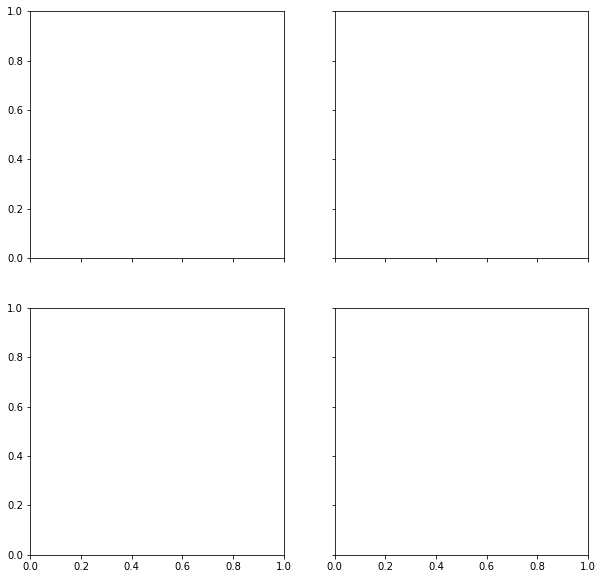

In [3]:
fig, axes = plt.subplots(2, 2, figsize=(10, 10), sharex=True, sharey=True)

(3,)


(10.0, 1000.0)

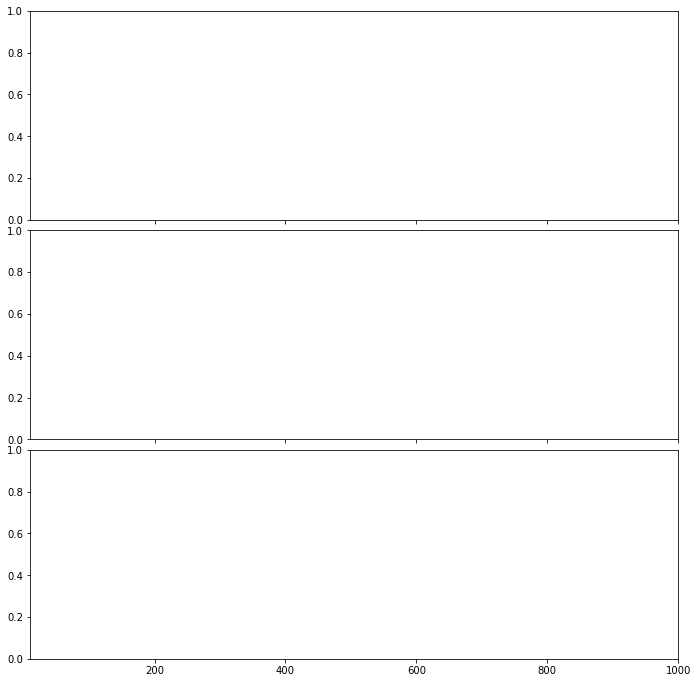

In [5]:
fig, axes = plt.subplots(3, 1, figsize=(10, 10), sharex=True)
print(axes.shape)
fig.subplots_adjust(left=0.05, bottom=0.05, right=0.95, top=0.95, hspace=0.05)
axes[0].set_xlim([10, 1000]) # share axis-x 

(100.0, 1000.0)

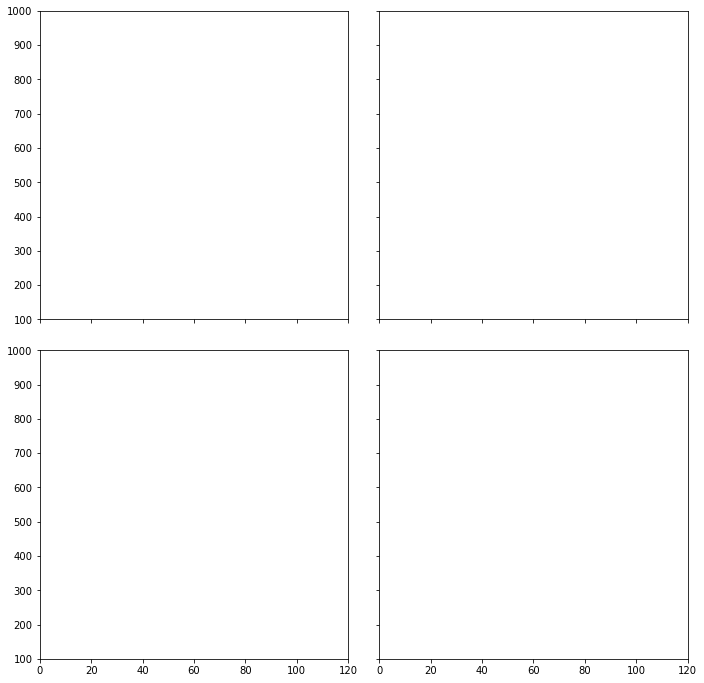

In [7]:
fig, axes = plt.subplots(2, 2, figsize=(10, 10), sharex=True, sharey=True)
fig.subplots_adjust(left=0.05, bottom=0.05, right=0.95, top=0.95, hspace=0.1, wspace=0.1)
axes[0, 0].set_xlim([0, 120])
axes[0, 0].set_ylim([100, 1000])

### Axis Sharing : using fig.add_subplot()

(0.0, 100.0)

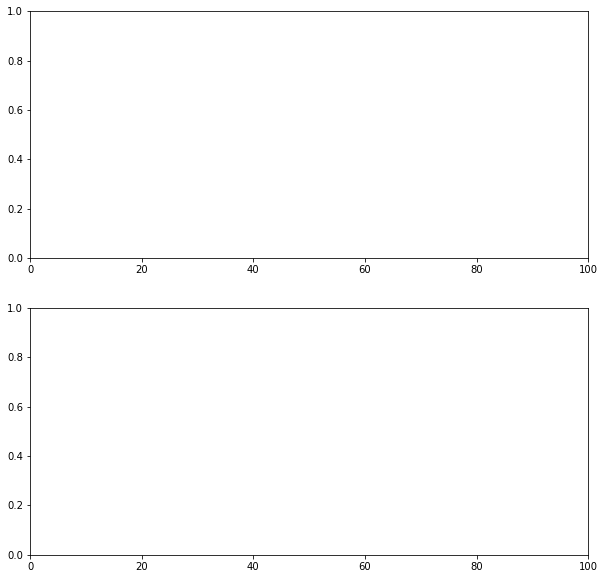

In [9]:
fig = plt.figure(figsize=(10, 10))

ax1 = fig.add_subplot(2, 1, 1)
ax2 = fig.add_subplot(2, 1, 2, sharex=ax1)
ax2.set_xlim([0, 100])

(10.0, 1000.0)

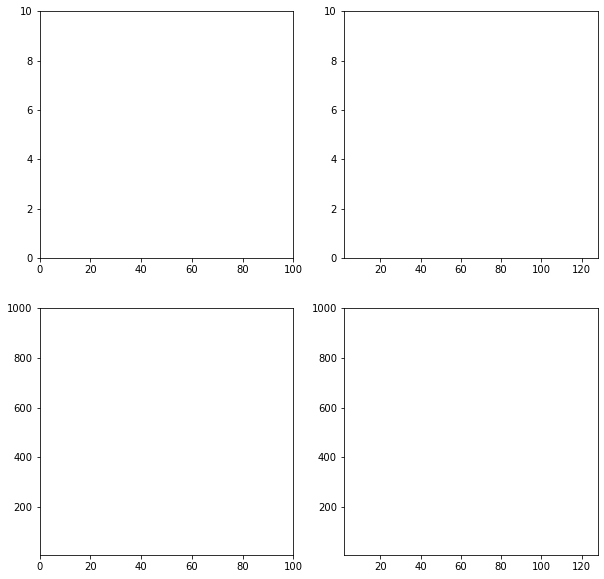

In [14]:
fig = plt.figure(figsize=(10, 10))

ax1_1 = fig.add_subplot(2, 2, 1)
ax1_2 = fig.add_subplot(2, 2, 2, sharey=ax1_1)
ax2_1 = fig.add_subplot(2, 2, 3, sharex=ax1_1)
ax2_2 = fig.add_subplot(2, 2, 4, sharex=ax1_2, sharey=ax2_1)

ax1_1.set_xlim([0, 100])
ax1_1.set_ylim([0, 10])
ax1_2.set_xlim([2, 128])
ax2_1.set_ylim([10, 1000])

(0.0, 100.0)

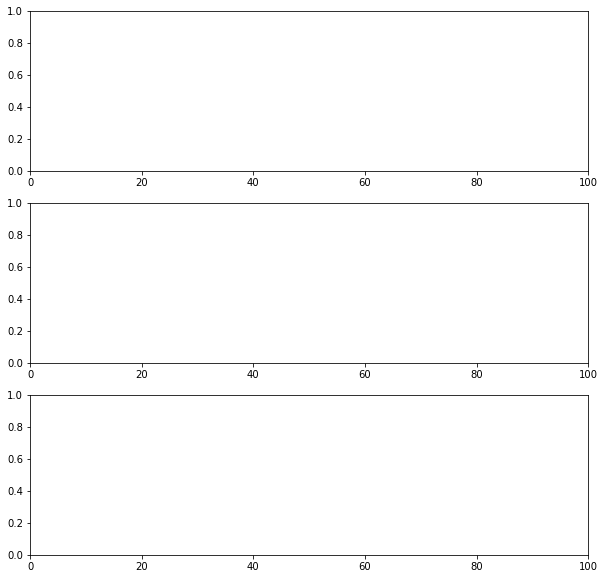

In [17]:
fig = plt.figure(figsize=(10, 10))

axes = np.empty(shape=(0,))

for i in range(1, 1 + 3):
    if i == 1:
        axes = np.append(axes, fig.add_subplot(3, 1, i))
    else:
        axes = np.append(axes, fig.add_subplot(3, 1, i, sharex=axes[0]))
        
axes[0].set_xlim([0, 100])

(0.0, 300.0)

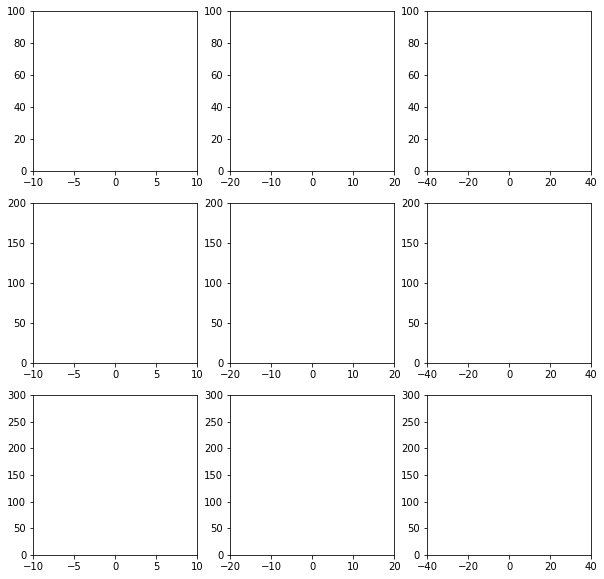

In [28]:
# 3 x 3, x/y axis sharing
fig = plt.figure(figsize=(10, 10))

n_rows, n_cols = 3, 3

axes = np.empty(shape=(0, 3))

for r_idx in range(n_rows):
    axes_row = np.empty(shape=(0,))
    
    for c_idx in range(n_cols):
        if r_idx == 0:
            if c_idx == 0:
                axes_row = np.append(axes_row, fig.add_subplot(n_rows, n_cols, r_idx * n_rows + c_idx + 1))
            else:
                axes_row = np.append(axes_row, fig.add_subplot(n_rows, n_cols, r_idx * n_rows + c_idx + 1, sharey=axes_row[0]))
        
        else:
            if c_idx == 0:
                axes_row = np.append(axes_row, fig.add_subplot(n_rows, n_cols, r_idx * n_rows + c_idx + 1, sharex=axes[0, 0]))
            else:
                axes_row = np.append(axes_row, fig.add_subplot(n_rows, n_cols, r_idx * n_rows + c_idx + 1, sharex=axes[0, c_idx], sharey=axes_row[0]))
    
    axes = np.vstack((axes, axes_row))
    
axes[0, 0].set_xlim([-10, 10])
axes[0, 1].set_xlim([-20, 20])
axes[0, 2].set_xlim([-40, 40])

axes[0, 0].set_ylim([0, 100])
axes[1, 0].set_ylim([0, 200])
axes[2, 0].set_ylim([0, 300])